#Assignment 2


#  Data pre-processing


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd "./drive/MyDrive/Colab Notebooks/"

/content/drive/MyDrive/Colab Notebooks


In [7]:
q1_data = pd.read_csv('Q1.csv')
q2_data = pd.read_csv('Q2.csv')

# **Q1 (a)**



In [9]:
from sklearn import tree, preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class q1_dataset:
  data = q1_data.iloc[:, :-1]
  target = q1_data.iloc[:, -1]
  feature_names = ['type', 'difficulty', 'learned\_before', 'completeness']
  feature_names = ['type=chemistry', 'type=language', 'type=math', 
                   'difficulty=easy', 'difficulty=hard', 'difficulty=medium', 
                   'learned\_before=no', 'learned\_before=yes', 
                   'completeness=good', 'completeness=poor']
  target_names = np.array(["not proper", "proper"], dtype="<U10")

In [ ]:
enc = preprocessing.OneHotEncoder()
# X = pd.DataFrame({'type':['chemistry','easy','no','good'], 
#                   'difficulty':['language','hard','yes','poor'], 
#                   ['math','medium','yes','poor']}
#                 )
enc.fit(q1_dataset.data)
q1_dataset.data = enc.transform(q1_dataset.data).toarray()

In [ ]:
pd.DataFrame(q1_dataset.data)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
# get labeled data from somewhere
dataset = q1_dataset
X_train, y_train = dataset.data[4:, :], dataset.target[4:]
X_test, y_test = dataset.data[:4, :], dataset.target[:4]

In [ ]:
y_train

In [ ]:
# create a decision tree classifier
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=1,  min_samples_split=4)

# fit the classifier to the dataset
clf = clf.fit(X_train, y_train)

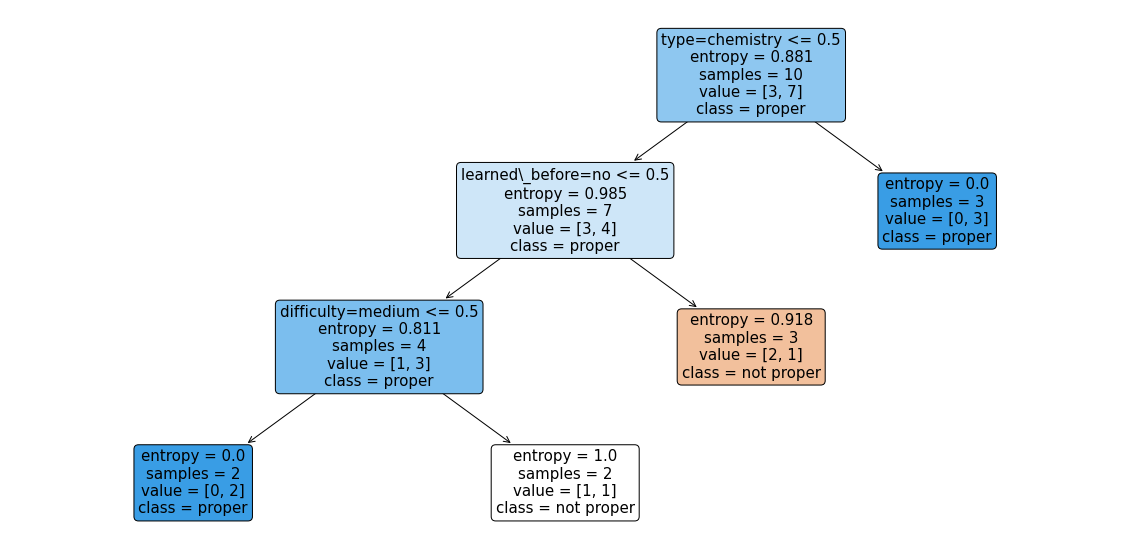

In [ ]:
plt.figure(figsize=(20, 10)) # increase fig size
tree.plot_tree(clf, feature_names=dataset.feature_names, 
        class_names=dataset.target_names, filled=True, rounded=True, fontsize=15)
plt.show()

In [ ]:
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
print("Accuracy score on train dataset: ", train_score)

test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
print("Accuracy score on test dataset: ", test_score)

Accuracy score on train dataset:  0.8
Accuracy score on test dataset:  0.25


# **Q1 (b)**


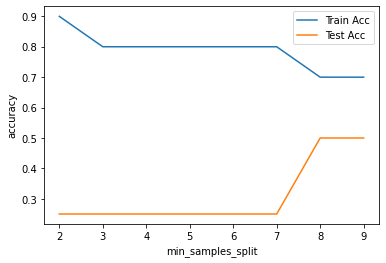

In [ ]:
train_acc = []
test_acc = []
y = list(range(2, 10))
for split in range(2, 10):
  clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=1,  min_samples_split=split)
  clf = clf.fit(X_train, y_train)
  train_acc.append(accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
  test_acc.append(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

plt.plot(y, train_acc)
plt.plot(y, test_acc)
plt.legend(['Train Acc', 'Test Acc'])
plt.ylabel('accuracy')
plt.xlabel('min_samples_split')
plt.show()

# **Q1 (c)**

In [ ]:
# create a decision tree classifier
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=1,  min_samples_split=4)

# fit the classifier to the dataset
clf = clf.fit(X_train, y_train)

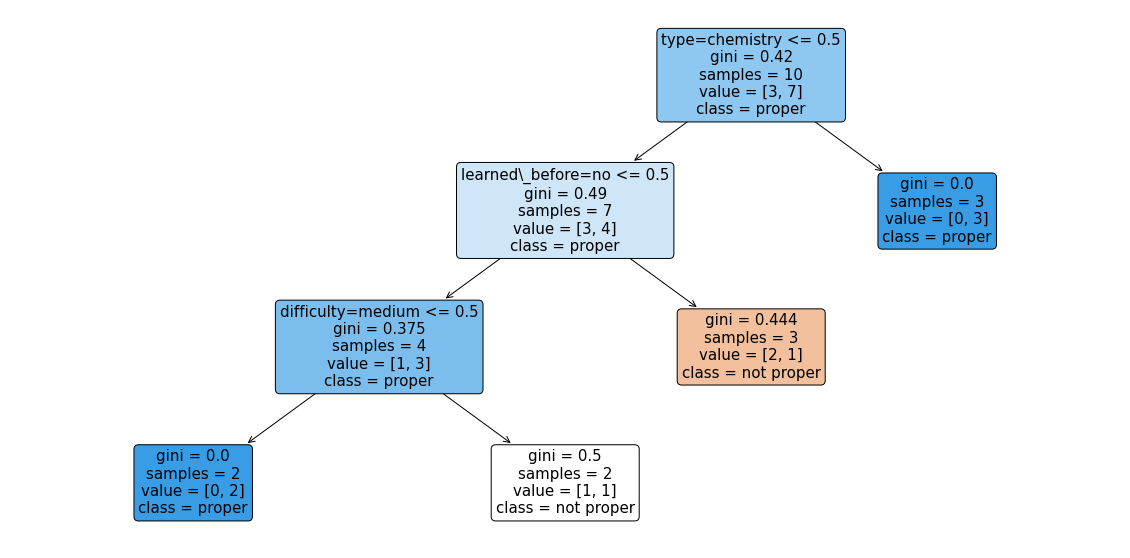

In [ ]:
plt.figure(figsize=(20, 10)) # increase fig size
tree.plot_tree(clf, feature_names=dataset.feature_names, 
        class_names=dataset.target_names, filled=True, rounded=True, fontsize=15)
plt.show()

# **Q1 (d)**

# **Q1 (e)**

# **Q1 (f)**

# **Q2 (a)**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [9]:
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(q2_data['text'], q2_data['sentiment'], random_state=1)

In [13]:
vec = CountVectorizer(stop_words='english', binary=True)
X_train = vec.fit_transform(X_train_text)
X_test = vec.transform(X_test_text)

In [25]:
bnb = BernoulliNB(alpha=0)
bnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


BernoulliNB(alpha=0)

 (i) training accuracy

In [26]:
bnb.score(X_train, y_train)

0.9615466666666667

 (ii) test accuracy

In [27]:
bnb.score(X_test, y_test)

0.77456

# **Q2 (b)**

P(word | sentiment) = P(sentiment | word)P(word)/P(sentiment)



In [29]:
q2_data['text_lower'] = q2_data['text'].str.lower()

In [73]:
# Custom function for calculating conditional probability
def get_conditional(word, sentiment):
  # Create new DataFrame
  df = pd.DataFrame()
  df['consist_word'] = q2_data['text_lower'].str.contains(word)
  df['sentiment'] = q2_data['sentiment']

  # Total occurence of the word
  occurence = sum(np.where((df['consist_word'] == True), 1, 0))

  # P(sentiment | word)
  likelyhood = sum(np.where((df['sentiment'] == sentiment) & (df['consist_word'] == True), 1, 0)) / occurence
  # P(word)
  prior = sum(np.where((df['consist_word'] == True), 1, 0)) / df.shape[0]
  # P(sentiment)
  marginal = sum(np.where((df['sentiment'] == sentiment), 1, 0)) / df.shape[0]

  return (likelyhood*prior)/marginal

Probability of seeing the word "excellent" given that the label is `positive`

In [74]:
p = get_conditional("excellent", 0)
p

0.11808

Probability of seeing the word "excellent" given that the label is `negative`

In [75]:
p = get_conditional("excellent", 1)
p

0.02816

Probability of seeing the word "terrible" given that the label is `positive`

In [76]:
p = get_conditional("terrible", 0)
p

0.01736

Probability of seeing the word "terrible" given that the label is `negative`

In [77]:
p = get_conditional("terrible", 1)
p

0.08976

The results are as expectd. The `negative` reviews more likely contain a negative word like `terrible` and vise versa.